In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
gold = yf.Ticker('Gold')
google = yf.Ticker('GOOG')

In [4]:
interval = '1d'
start = '2023-1-1'
end = '2024-1-1'

In [5]:
gold_df = gold.history(interval='1d',start=start,end=end)
google_df = google.history(interval='1d',start=start,end=end)

In [6]:
gold_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03,17.004981,17.402475,16.917727,17.286135,16347400,0.0,0
2023-01-04,17.596373,18.478616,17.557594,18.304106,29096000,0.0,0
2023-01-05,18.071424,18.255629,17.780576,18.207155,17933600,0.0,0
2023-01-06,18.517396,18.585260,17.955088,18.459227,21704000,0.0,0
2023-01-09,18.633736,18.779162,18.381666,18.391361,18346700,0.0,0


In [7]:
google_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03,89.830002,91.550003,89.019997,89.699997,20738500,0,0
2023-01-04,91.010002,91.239998,87.800003,88.709999,27046500,0,0
2023-01-05,88.070000,88.209999,86.559998,86.769997,23136100,0,0
2023-01-06,87.360001,88.470001,85.570000,88.160004,26612600,0,0
2023-01-09,89.195000,90.830002,88.580002,88.800003,22996700,0,0


In [8]:
prices = pd.DataFrame({'gold': gold_df['Close'], 'google': google_df['Close']})
returns = np.log(prices).diff(periods=1).dropna()

In [9]:
gold_ret = returns['gold'].values
google_ret = returns['google'].values

In [10]:
# gold_ret = gold_df['Close'].pct_change().dropna().values
# google_ret = google_df['Close'].pct_change().dropna().values

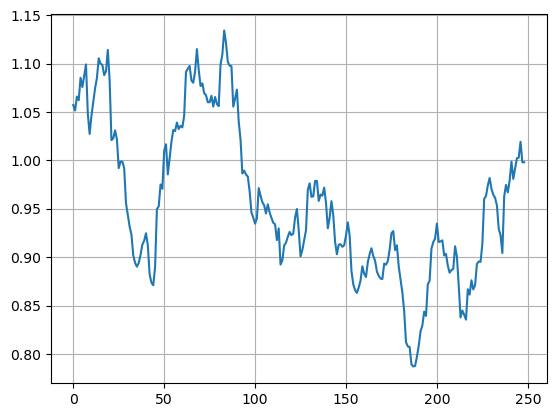

In [11]:
gold_portfolio = gold_ret + 1
plt.grid(True)
plt.plot(np.cumprod(gold_portfolio));

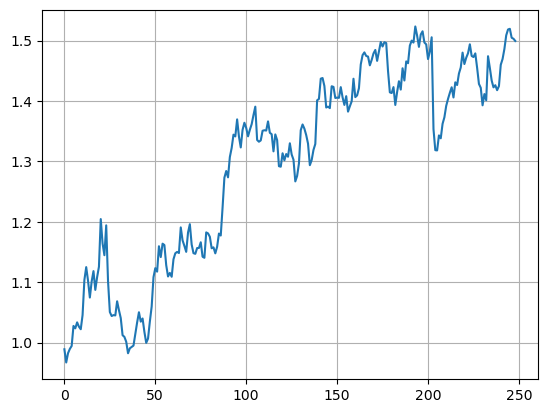

In [12]:
google_portfolio = google_ret + 1
plt.grid(True)
plt.plot(np.cumprod(google_portfolio));

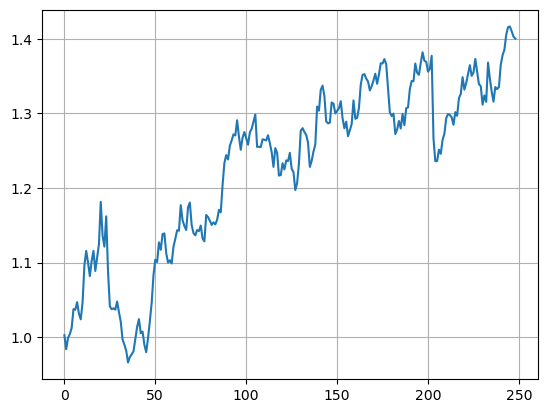

In [13]:
exaple_portfolio = (0.2 * gold_ret + 0.8 * google_ret) + 1
plt.grid(True)
plt.plot(np.cumprod(exaple_portfolio));

In [14]:
num_paths = 100000
bootstraped_paths = np.random.choice(np.arange(returns.shape[0]), size=(num_paths, 252), replace=True)

gold_bootstrap_sample = gold_ret[bootstraped_paths]
google_bootstrap_sample = google_ret[bootstraped_paths]

In [15]:
strategy_bootstrap_sample = 0.8 * google_bootstrap_sample + 0.2 * gold_bootstrap_sample

In [16]:
gold_simulated_paths = np.cumprod(gold_bootstrap_sample + 1, axis=1)
google_simulated_paths = np.cumprod(google_bootstrap_sample + 1, axis=1)
strategy_simulated_paths = np.cumprod(strategy_bootstrap_sample + 1, axis=1)

In [17]:
gold_final_returns = (gold_simulated_paths[:, -1] - 1) * 100
google_final_returns = (google_simulated_paths[:, -1] - 1) * 100
strategy_final_returns = (strategy_simulated_paths[:, -1] - 1) * 100

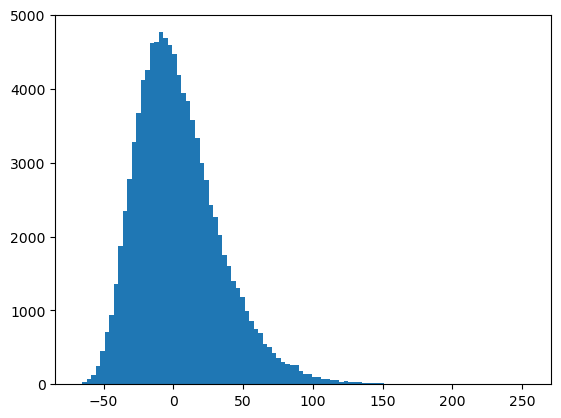

In [18]:
plt.hist(gold_final_returns, 100);

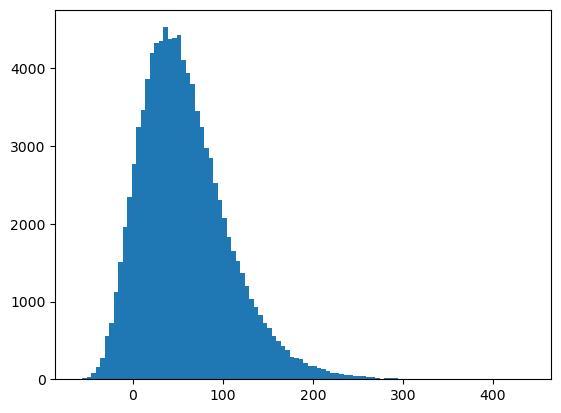

In [19]:
plt.hist(google_final_returns, 100);

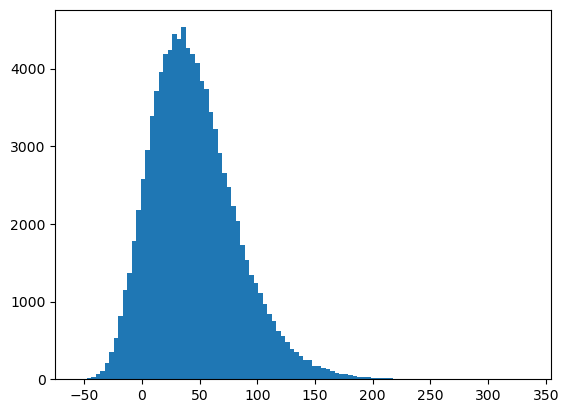

In [20]:
plt.hist(strategy_final_returns, 100);

In [21]:
def plot_cdf(returns, confidence_level = 0.95):
    
    # Calculate empirical CDF
    sorted_returns = np.sort(returns)
    n = len(sorted_returns)
    cdf = np.arange(1, n + 1) / n
    alpha = 1 - confidence_level

    var = np.round(np.percentile(sorted_returns, alpha * 100), 3) # value at risk
    # Plot CDF
    plt.figure(figsize=(8, 6))
    plt.plot(sorted_returns, cdf, marker='.', linestyle='none')
    plt.title(f'Empirical Cumulative Distribution Function (CDF) of Returns; var = {var}')
    plt.xlabel('Final Return %')
    plt.ylabel('Cumulative Probability')
    plt.axhline(y=0.05, color='r', linestyle='--', label=f'{(1 - alpha) * 100}% CI,')
    plt.legend()
    plt.grid(True)
    plt.show()

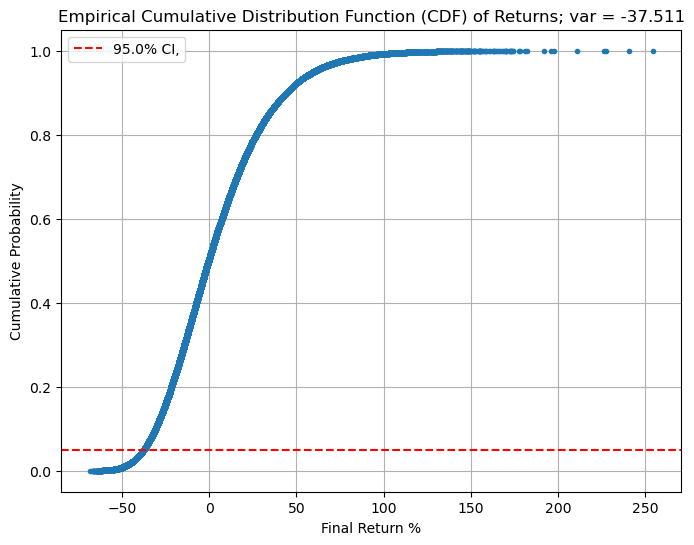

In [22]:
plot_cdf(gold_final_returns)

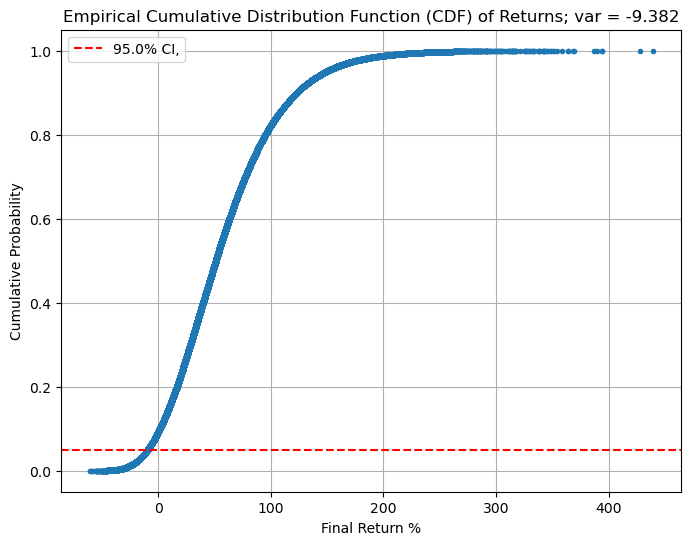

In [23]:
plot_cdf(google_final_returns)

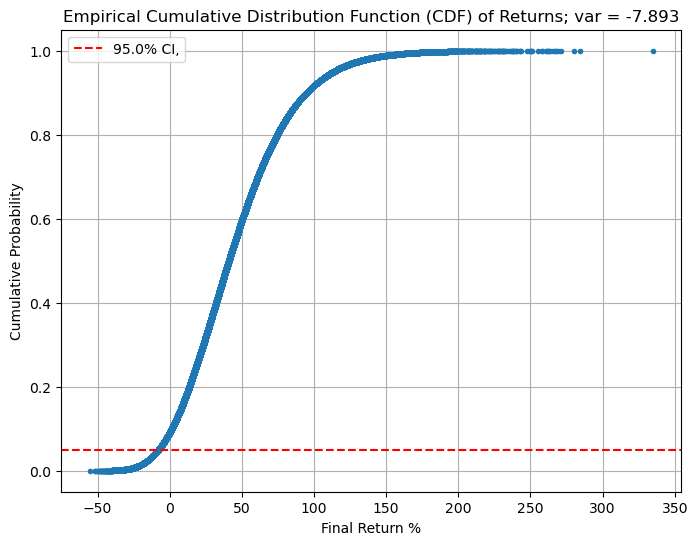

In [24]:
plot_cdf(strategy_final_returns)

In [25]:
CIs = [1, 5, 10, 25, 50, 75, 90, 95, 99]
performance_dict = {'Confidence Level (%)': CIs}

performance_dict['gold_ci'] = [np.round(np.percentile(gold_final_returns, 100-ci), 2) for ci in CIs]
performance_dict['google_ci'] = [np.round(np.percentile(google_final_returns, 100-ci), 2) for ci in CIs]
performance_dict['strategy_ci'] = [np.round(np.percentile(strategy_final_returns, 100-ci), 2) for ci in CIs]

df_strategy = pd.DataFrame(performance_dict)
df_strategy

,Confidence Level (%),gold_ci,google_ci,strategy_ci
0,1,94.16,206.52,153.42
1,5,59.90,148.89,113.34
2,10,44.28,122.84,94.87
3,25,20.98,85.61,67.19
4,50,-0.36,51.16,40.89
5,75,-17.79,22.65,18.47
6,90,-30.80,1.44,1.29
7,95,-37.51,-9.38,-7.89
8,99,-48.85,-26.89,-22.69
